In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import scipy as sp
import re
import matplotlib.pylab as plt

In [ ]:
drive.mount('/content/drive')
filename = '/content/drive/My Drive/LaboDatos2022/PrimeraEjercitacion/WorldCupMatches.csv'
matches = pd.read_csv(filename)
filename2 = '/content/drive/My Drive/LaboDatos2022/PrimeraEjercitacion/WorldCupPlayers.csv'
players = pd.read_csv(filename2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Primero limpio un poco los dataframes que voy a usar

In [ ]:
def arregla_paises(x):
    if 'rn">' in x:   #Aparente error de tipeo
      return 'Republic of Ireland'
    elif 'German' in x:   #Debido a las tres alemanias que han competido en copas del mundo
      return 'Germany'
    else:
      return x

def arregla_iniciales_paises(x):
  if 'GDR' in x or 'FRG' in x:
    return 'GER'
  else:
    return x

In [ ]:
matches = matches.drop_duplicates()
matches = matches.dropna(how="all")
players = players.drop_duplicates()
players = players.dropna(how='all')

matches['Home Team Name'] = matches['Home Team Name'].apply(arregla_paises)
matches['Away Team Name'] = matches['Away Team Name'].apply(arregla_paises)

players['Team Initials'] = players['Team Initials'].apply(arregla_iniciales_paises)

Consigna 1

Busco el promedio de gol por mundial

In [ ]:
matches['Total Goals'] = matches['Home Team Goals'] + matches['Away Team Goals']
mundiales = matches['Year'].astype(int).value_counts().rename_axis('Year').to_frame('Matches')
mundiales['Goals'] = np.zeros(len(mundiales))
mundiales['Goals Mean'] = np.zeros(len(mundiales))

for year in mundiales.index:
  indice_anio = matches['Year']==year
  mundiales['Goals'][year]=matches['Total Goals'][indice_anio].sum()
  mundiales['Goals Mean'][year]=matches['Total Goals'][indice_anio].mean()

mundiales = mundiales.sort_values('Goals Mean',ascending=False)
print(mundiales)

      Matches  Goals  Goals Mean
Year                            
1954       26  140.0    5.384615
1938       18   84.0    4.666667
1934       17   70.0    4.117647
1950       22   88.0    4.000000
1930       18   70.0    3.888889
1958       35  126.0    3.600000
1970       32   95.0    2.968750
1982       52  146.0    2.807692
1962       32   89.0    2.781250
1966       32   89.0    2.781250
1994       52  141.0    2.711538
1978       38  102.0    2.684211
2014       64  171.0    2.671875
1998       64  171.0    2.671875
1974       38   97.0    2.552632
1986       52  132.0    2.538462
2002       64  161.0    2.515625
2006       64  147.0    2.296875
2010       64  145.0    2.265625
1990       52  115.0    2.211538


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


A parte de 'Goals Mean' y el índice por año, acá definí las columnas 'Matches' y 'Goals', las cuales no son necesarias pero acompañan para visualizar mejor el promedio.

In [ ]:
ranking = list(mundiales.index.astype(int))
print('Ranking de mundiales por promedio de goles =', ranking)

Ranking de mundiales por promedio de goles = [1954, 1938, 1934, 1950, 1930, 1958, 1970, 1982, 1962, 1966, 1994, 1978, 2014, 1998, 1974, 1986, 2002, 2006, 2010, 1990]


Defino una funcion auxiliar para graficar un ranking

In [ ]:
def graficar_ranking(ranking, ejeX, ejeY, titulo):
  fig, axs = plt.subplots(nrows = 1, figsize = (18, 6))
  axs.grid('on', linestyle = 'dashed', alpha = 0.5)
  axs.set_title(titulo)
  axs.set_ylabel(ejeY)
  axs.set_xlabel(ejeX)

  axs.bar(x = [i for i in range(len(ranking))],
            height = ranking[ejeY],
            color = plt.get_cmap('Set2').colors
            )

  axs.set_xticks([i for i in range(len(ranking))])

  axs.set_xticklabels([m for m in ranking.index],
                        rotation = 45
                        )

  axs.tick_params(axis='both', which='major', labelsize = 12)

  plt.show()

Grafico:

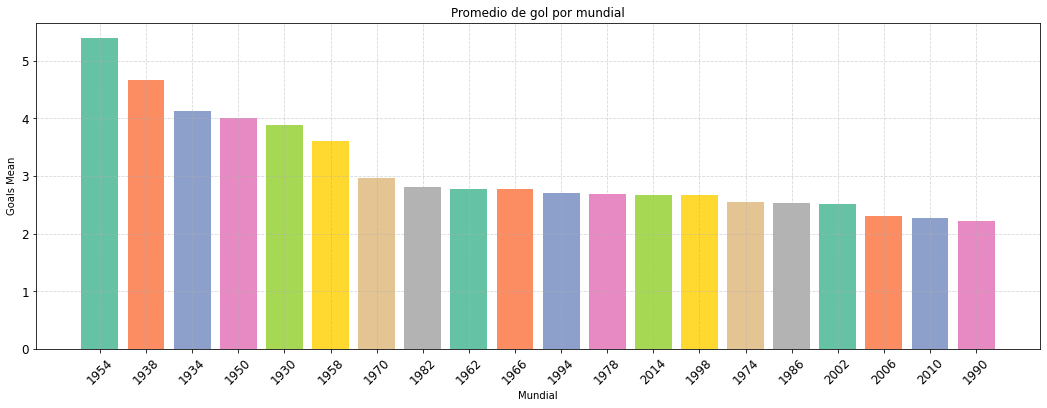

In [ ]:
graficar_ranking(mundiales,'Mundial', 'Goals Mean', 'Promedio de gol por mundial')

Consigna 2

Primero filtramos los partidos que se definieron por penales

In [ ]:
partidos_comunes = matches[matches['Win conditions']==' '].index
penales = matches.drop(partidos_comunes)
penales = penales[['Home Team Name'] + ['Away Team Name'] + ['Win conditions'] + ['MatchID']]

for partido in penales.index:
  if 'penalties' not in penales['Win conditions'][partido]:
    penales = penales.drop(partido)

Luego definimos quien ganó

In [ ]:
penales['Winner'] = " "

for partido in penales.index:
  goles_partido = [int(gol) for gol in re.findall(r'-?\d+\.?\d*', penales['Win conditions'][partido])] #Uso una funcion que encuentra todos los numeros en un texto y los devuelve en una lista
  goles_local = goles_partido[0]
  goles_visitante = goles_partido[1]
  if goles_local>goles_visitante:
    penales['Winner'][partido]=penales['Home Team Name'][partido]
  else:
    penales['Winner'][partido]=penales['Away Team Name'][partido]

print(penales[['MatchID'] + ['Winner']]) #imprimo solo el id de cada partido y quien lo ganó

         MatchID               Winner
357        914.0              Germany
404        440.0               France
405        575.0              Germany
406        421.0              Belgium
452        248.0  Republic of Ireland
456         31.0            Argentina
460         28.0            Argentina
461        159.0              Germany
507       3092.0             Bulgaria
511       3095.0               Sweden
515       3104.0               Brazil
571       8779.0            Argentina
572       8781.0               France
576       8785.0               Brazil
630   43950052.0                Spain
639   43950059.0       Korea Republic
697   97410054.0              Ukraine
700   97410057.0              Germany
702   97410059.0             Portugal
707   97410064.0                Italy
762  300061497.0             Paraguay
765  300061508.0              Uruguay
820  300186487.0               Brazil
829  300186490.0            Argentina
830  300186488.0          Netherlands
833  3001864

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Ahora extraigo cuales fueron los paises que mas ganaron por penales

In [ ]:
ganadores_penales = penales['Winner'].value_counts().rename_axis('Country').to_frame('Matches')
print(ganadores_penales)

                     Matches
Country                     
Germany                    4
Argentina                  4
Brazil                     3
France                     2
Ukraine                    1
Netherlands                1
Uruguay                    1
Paraguay                   1
Italy                      1
Portugal                   1
Spain                      1
Korea Republic             1
Sweden                     1
Bulgaria                   1
Republic of Ireland        1
Belgium                    1
Costa Rica                 1


Gráfico:

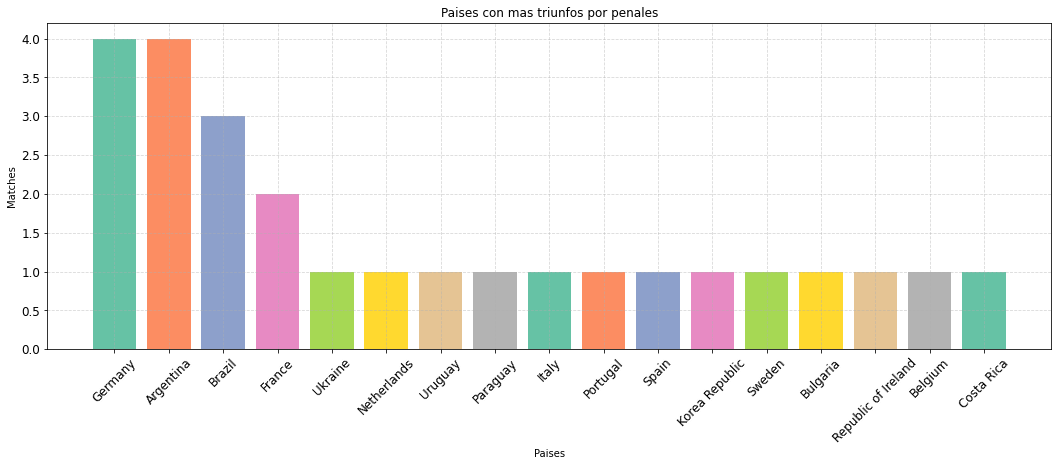

In [ ]:
graficar_ranking(ganadores_penales,'Paises', 'Matches', 'Paises con mas triunfos por penales')

Ahora busco al arquero que mas partidos ganó por penales

Primero creo el dataframe de arqueros

In [ ]:
no_arqueros = players[players['Position']!='GK'].index
arqueros = players.drop(no_arqueros)
arqueros = arqueros[['Player Name'] + ['Position'] + ['Line-up'] + ['MatchID'] + ['Event'] + ['Team Initials']]
arqueros=arqueros.drop(['Position'], axis=1)
print(arqueros)

           Player Name Line-up    MatchID Event Team Initials
0          Alex THEPOT       S       1096   NaN           FRA
1      Oscar BONFIGLIO       S       1096   NaN           MEX
33       Jimmy DOUGLAS       S       1090   NaN           USA
34       Arnold BADJOU       S       1090   NaN           BEL
65      Milovan JAKSIC       S       1093   NaN           YUG
...                ...     ...        ...   ...           ...
37003           HOWARD       S  300186497   NaN           USA
37024         MIGNOLET       N  300186497   NaN           BEL
37025            GUZAN       N  300186497   NaN           USA
37026           BOSSUT       N  300186497   NaN           BEL
37027          RIMANDO       N  300186497   NaN           USA

[2348 rows x 5 columns]


Arreglo la columna de ganadores del dataframe de penales para que sea compatible con el de arqueros

In [ ]:
def arregla_paises_por_iniciales(x):
    if 'Argentina' in x:
      return 'ARG'
    elif 'Brazil' in x:
      return 'BRA'
    elif 'France' in x:
      return 'FRA'
    elif 'Germany' in x:
      return 'GER'
    elif 'Netherlands' in x:
      return 'NED'
    elif 'Uruguay' in x:
      return 'URU'
    elif 'Paraguay' in x:
      return 'PAR'
    elif 'Italy' in x:
      return 'ITA'
    elif 'Portugal' in x:
      return 'POR'
    elif 'Korea Republic' in x:
      return 'KOR'
    elif 'Ukraine' in x:
      return 'UKR'
    elif 'Spain' in x:
      return 'ESP'
    elif 'Sweden' in x:
      return 'SWE'
    elif 'Bulgaria' in x:
      return 'BUL'
    elif 'Republic of Ireland' in x:
      return 'IRL'
    elif 'Belgium' in x:
      return 'BEL'
    elif 'Costa Rica' in x:
      return 'CRC'
    else:
      return x

penales = penales.loc[:, ['MatchID', 'Winner']]
penales['Winner'] = penales['Winner'].apply(arregla_paises_por_iniciales)
print(penales)

         MatchID Winner
357        914.0    GER
404        440.0    FRA
405        575.0    GER
406        421.0    BEL
452        248.0    IRL
456         31.0    ARG
460         28.0    ARG
461        159.0    GER
507       3092.0    BUL
511       3095.0    SWE
515       3104.0    BRA
571       8779.0    ARG
572       8781.0    FRA
576       8785.0    BRA
630   43950052.0    ESP
639   43950059.0    KOR
697   97410054.0    UKR
700   97410057.0    GER
702   97410059.0    POR
707   97410064.0    ITA
762  300061497.0    PAR
765  300061508.0    URU
820  300186487.0    BRA
829  300186490.0    ARG
830  300186488.0    NED
833  300186459.0    CRC


Ahora uno el dataframe de arqueros con el de penales. De ahí me quedo con los que atajaron los penales

In [ ]:
partidos_por_penales = list(penales['MatchID'])
arqueros = arqueros[arqueros.MatchID.isin(partidos_por_penales)]
ganadores = pd.merge(arqueros, penales, on='MatchID')

perdedores = ganadores[ganadores['Team Initials'] != ganadores['Winner']].index
ganadores=ganadores.drop(perdedores)
ganadores=ganadores.drop(['Team Initials']+['Winner'], axis=1)

for arquero in ganadores.index:
  if ganadores['Line-up'][arquero] == 'N' and pd.isna(ganadores['Event'][arquero]):
    ganadores = ganadores.drop(arquero)
  elif not pd.isna(ganadores['Event'][arquero]) and 'O' in ganadores['Event'][arquero]:
    ganadores = ganadores.drop(arquero)

print(ganadores)

          Player Name Line-up    MatchID  Event
0   Harald SCHUMACHER       S        914    NaN
3           Joel BATS       S        440    NaN
4   Harald SCHUMACHER       S        575    NaN
7    Jean Marie PFAFF       S        421    NaN
8          Pat BONNER       S        248    NaN
10   Sergio GOYCOCHEA       S         31    NaN
12   Sergio GOYCOCHEA       S         28    NaN
18       Bodo ILLGNER       S        159    NaN
22     Thomas RAVELLI       S       3095    NaN
23           TAFFAREL       S       3104    NaN
25         Carlos ROA       S       8779  Y110'
28     Fabien BARTHEZ       S       8781    NaN
29           TAFFAREL       S       8785    NaN
31           CASILLAS       S   43950052    NaN
34            W J LEE       S   43950059    NaN
36        SHOVKOVSKYI       S   97410054    NaN
41            LEHMANN       S   97410057    NaN
44            RICARDO       S   97410059    NaN
45             BUFFON       S   97410064    NaN
52            MUSLERA       S  300061508

Finalmente tengo cuales son los arqueros que mas veces ganaron por penales

In [ ]:
ganadores = ganadores['Player Name'].value_counts().rename_axis('Player Name').to_frame('Matches')
print(ganadores)

                   Matches
Player Name               
Harald SCHUMACHER        2
Sergio GOYCOCHEA         2
TAFFAREL                 2
SHOVKOVSKYI              1
KRUL                     1
ROMERO                   1
JULIO CESAR              1
MUSLERA                  1
BUFFON                   1
RICARDO                  1
LEHMANN                  1
CASILLAS                 1
W J LEE                  1
Joel BATS                1
Fabien BARTHEZ           1
Carlos ROA               1
Thomas RAVELLI           1
Bodo ILLGNER             1
Pat BONNER               1
Jean Marie PFAFF         1
NAVAS K.                 1


Gráfico:

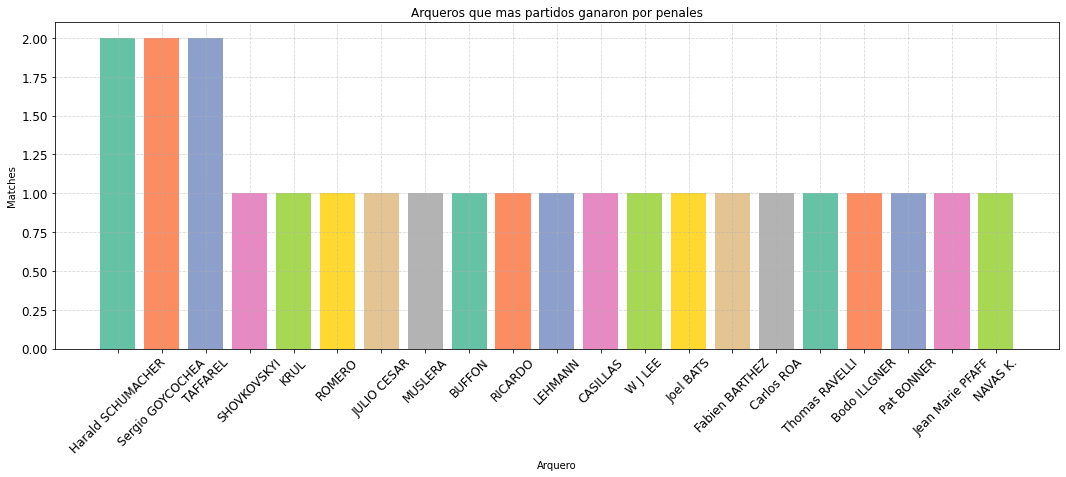

In [ ]:
graficar_ranking(ganadores,'Arquero', 'Matches', 'Arqueros que mas partidos ganaron por penales')

Consigna 3

Defino a que fase pertenece cada id de ronda. Puede ser 'G'(grupos) o 'E' (eliminacion)

In [ ]:
def definir_fase(fase):
  fase = fase.lower()
  if 'group' in fase:
    return 'G'
  else:
    return 'E'

fases = matches.loc[:,['RoundID', 'Stage']]
fases['Stage']=fases['Stage'].apply(definir_fase)
fases=fases.drop_duplicates()

print(fases)

      RoundID Stage
0       201.0     G
15      202.0     E
17      405.0     E
18      204.0     E
26      418.0     E
..        ...   ...
820  255951.0     E
824  255953.0     E
826  255955.0     E
827  255957.0     E
828  255959.0     E

[101 rows x 2 columns]


Ahora armo el dataframe con los jugadores que metieron gol y puedo ver en que minutos de cada partido se convirtieron sus goles

In [ ]:
def solo_goles(eventos):
    goles = []
    eventos = eventos.split(' ')
    for evento in eventos:
      if ('G' in evento) or (('P' in evento) and ('MP' not in evento) or ('W' in evento)):
        goles = np.append(goles,evento)
    return ' '.join(goles)

def definir_columna_goles(goleadores):
  for goleador in goleadores.index:
    goles_int = [int(gol) for gol in re.findall(r'-?\d+\.?\d*', goleadores['Event'][goleador])] #Esta funcion encuentra numeros en un texto y los devuelve en una lista
    goleadores['Goals'][goleador] = goles_int
  return goleadores

goleadores_general = players[['MatchID'] + ['RoundID'] + ['Event']]
goleadores_general = goleadores_general.dropna()
goleadores_general['Event'] = goleadores_general['Event'].apply(solo_goles)
sin_eventos = goleadores_general[goleadores_general['Event']==''].index
goleadores_general = goleadores_general.drop(sin_eventos)   #Elimino a todos los que no tienen goles en sus eventos

goleadores_general['Goals']=' '   #Armo una nueva columna donde pongo todos los goles (solo numeros, sin las letras que acompañan a los eventos)
goleadores_general = definir_columna_goles(goleadores_general)
goleadores_general = goleadores_general.dropna()
goleadores_general = goleadores_general.drop(['Event'],axis=1)

print(goleadores_general)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


         MatchID  RoundID     Goals
2           1096      201      [40]
3           1096      201      [70]
6           1096      201  [43, 87]
14          1096      201      [19]
35          1090      201      [45]
...          ...      ...       ...
36927  300186459   255951      [90]
36964  300186503   255951     [118]
37012  300186497   255951      [93]
37030  300186497   255951     [105]
37041  300186497   255951     [107]

[2032 rows x 3 columns]


Uniendo ambos dataframes puedo separar entre los goles de partidos por grupos o eliminacion

In [ ]:
goleadores_general = pd.merge(goleadores_general, fases, on='RoundID')

goleadores_grupos=goleadores_general[goleadores_general['Stage']=='G']
goleadores_eliminacion=goleadores_general[goleadores_general['Stage']=='E']

goleadores_general = goleadores_general.drop(['Stage'],axis=1)
goleadores_grupos = goleadores_grupos.drop(['Stage'],axis=1)
goleadores_eliminacion = goleadores_eliminacion.drop(['Stage'],axis=1)

print(goleadores_general)
print(goleadores_grupos)
print(goleadores_eliminacion)

        MatchID  RoundID     Goals
0          1096      201      [40]
1          1096      201      [70]
2          1096      201  [43, 87]
3          1096      201      [19]
4          1090      201      [45]
...         ...      ...       ...
2027  300186474   255955  [69, 79]
2028  300186502   255957      [17]
2029  300186502   255957       [3]
2030  300186502   255957      [90]
2031  300186501   255959     [113]

[2032 rows x 3 columns]
        MatchID  RoundID     Goals
0          1096      201      [40]
1          1096      201      [70]
2          1096      201  [43, 87]
3          1096      201      [19]
4          1090      201      [45]
...         ...      ...       ...
1995  300186476   255931      [80]
1996  300186476   255931      [31]
1997  300186480   255931      [78]
1998  300186506   255931       [6]
1999  300186506   255931      [60]

[1458 rows x 3 columns]
        MatchID  RoundID     Goals
38         1088      202      [56]
39         1088      202  [69, 87]
40   

Ahora puedo extraer una lista con los minutos en los que se convirtieron los goles y con esta armo la distribucion a lo largo de los 120 minutos de juego. Defino y uso funciones auxiliares

In [ ]:
def distribucion(minutos):
  distribucion = pd.DataFrame()
  distribucion['Goles'] = np.zeros(121)
  distribucion = distribucion.rename_axis('Minutos').reset_index()
  for minuto in minutos:
    distribucion['Goles'][minuto] += 1
  return distribucion.groupby([pd.cut(distribucion['Minutos'], 30)])['Goles'].sum().astype(int)

def goles_por_minuto(goleadores):
  minutos = []
  for goleador in goleadores.index:
    minutos = np.append(minutos, goleadores['Goals'][goleador])
  minutos = minutos.astype(int)
  return minutos

In [ ]:
minutos_goles_general = goles_por_minuto(goleadores_general)
distribucion_general = distribucion(minutos_goles_general)

minutos_goles_grupos = goles_por_minuto(goleadores_grupos)
distribucion_grupos = distribucion(minutos_goles_grupos)

minutos_goles_eliminacion = goles_por_minuto(goleadores_eliminacion)
distribucion_eliminacion = distribucion(minutos_goles_eliminacion)

print(distribucion_general)
print(distribucion_grupos)
print(distribucion_eliminacion)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Minutos
(-0.12, 4.0]       70
(4.0, 8.0]         86
(8.0, 12.0]       100
(12.0, 16.0]       76
(16.0, 20.0]      117
(20.0, 24.0]       83
(24.0, 28.0]       98
(28.0, 32.0]       83
(32.0, 36.0]       73
(36.0, 40.0]       96
(40.0, 44.0]       92
(44.0, 48.0]      110
(48.0, 52.0]      102
(52.0, 56.0]      104
(56.0, 60.0]      105
(60.0, 64.0]       95
(64.0, 68.0]      118
(68.0, 72.0]      110
(72.0, 76.0]      126
(76.0, 80.0]      112
(80.0, 84.0]      137
(84.0, 88.0]      115
(88.0, 92.0]      112
(92.0, 96.0]       10
(96.0, 100.0]       4
(100.0, 104.0]     10
(104.0, 108.0]      9
(108.0, 112.0]      8
(112.0, 116.0]      8
(116.0, 120.0]     10
Name: Goles, dtype: int64
Minutos
(-0.12, 4.0]       52
(4.0, 8.0]         58
(8.0, 12.0]        62
(12.0, 16.0]       56
(16.0, 20.0]       81
(20.0, 24.0]       66
(24.0, 28.0]       62
(28.0, 32.0]       58
(32.0, 36.0]       59
(36.0, 40.0]       71
(40.0, 44.0]       64
(44.0, 48.0]       87
(48.0, 52.0]       76
(52.0, 56.0]

Primero defino una funcion auxiliar para graficar distribuciones de goles

In [ ]:
def graficar_distribucion(distribucion, titulo):
  fig, axs = plt.subplots(nrows = 1, figsize = (18, 6))
  axs.grid('on', linestyle = 'dashed', alpha = 0.5)
  axs.set_title(titulo)
  axs.set_ylabel('Goles')
  axs.set_xlabel('Rangos')

  axs.bar(x = [i for i in range(len(distribucion))],
            height = distribucion,
            color = plt.get_cmap('Set2').colors
            )

  axs.set_xticks([i for i in range(len(distribucion))])

  axs.set_xticklabels([m for m in distribucion.keys()],
                        rotation = 45
                        )

  axs.tick_params(axis='both', which='major', labelsize = 12)

  plt.show()

Gráficos:

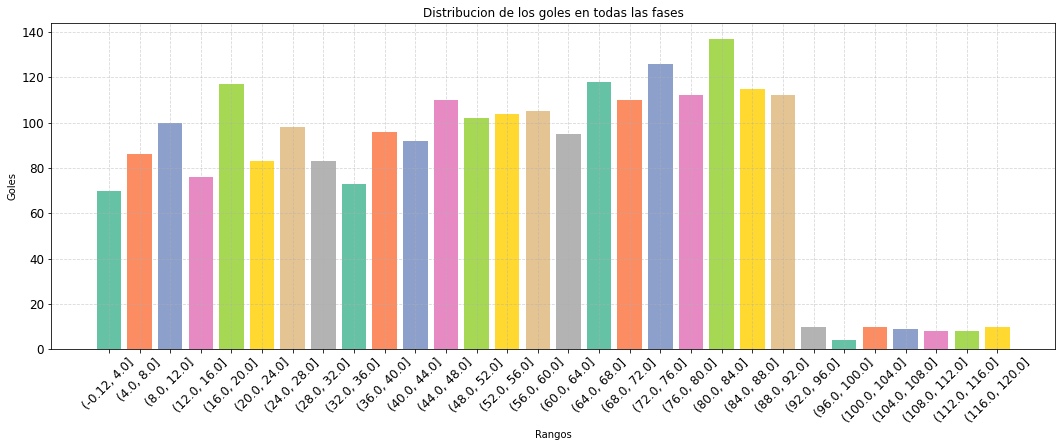

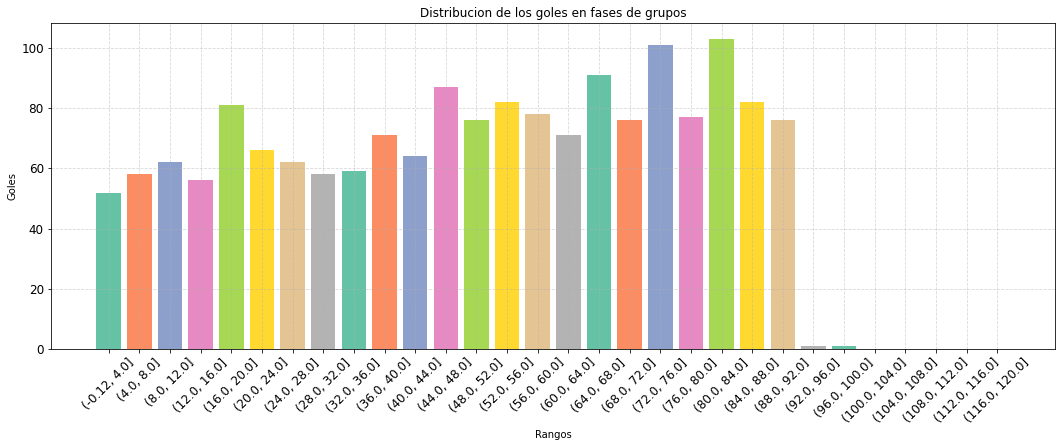

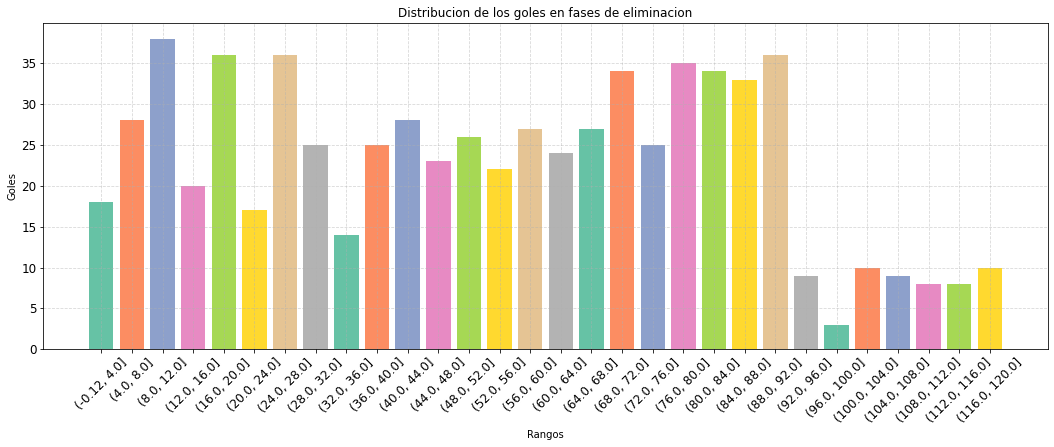

In [ ]:
graficar_distribucion(distribucion_general, 'Distribucion de los goles en todas las fases')
graficar_distribucion(distribucion_grupos, 'Distribucion de los goles en fases de grupos')
graficar_distribucion(distribucion_eliminacion, 'Distribucion de los goles en fases de eliminacion')

Consigna 4

Armo un diccionario que muestre la lista de goles de cada partido

In [ ]:
id_partidos = goleadores_general['MatchID'].unique()
goles_partido = {}
for id in id_partidos:
  goles_partido[id] = np.nan

for goleador in goleadores_general.index:
  clave = goleadores_general['MatchID'][goleador]
  nuevos_goles = goleadores_general['Goals'][goleador]
  goles_partido[clave] = np.append(goles_partido[clave],nuevos_goles)
  goles_partido[clave] = [g for g in goles_partido[clave] if not pd.isna(g)]

print(goles_partido)

{1096: [40.0, 70.0, 43.0, 87.0, 19.0], 1090: [45.0, 23.0, 69.0], 1093: [30.0, 62.0, 21.0], 1098: [1.0, 89.0, 79.0, 75.0], 1085: [81.0], 1095: [51.0, 3.0, 65.0], 1092: [65.0, 85.0, 60.0, 67.0], 1097: [10.0, 15.0, 50.0], 1099: [60.0], 1094: [65.0], 1086: [53.0, 75.0, 12.0, 55.0, 8.0, 17.0, 80.0, 42.0, 65.0], 1091: [67.0, 83.0, 37.0, 73.0], 1089: [40.0], 1100: [30.0, 35.0, 7.0, 24.0], 1084: [15.0, 51.0, 12.0, 13.0], 1088: [56.0, 69.0, 87.0, 20.0, 80.0, 85.0, 89.0], 1101: [20.0, 31.0, 18.0, 67.0, 72.0, 61.0, 4.0], 1087: [89.0, 57.0, 12.0, 68.0, 37.0, 20.0], 1104: [93.0, 44.0, 18.0, 109.0, 116.0], 1119: [35.0, 39.0, 11.0, 31.0, 61.0, 53.0], 1133: [29.0, 7.0, 43.0, 69.0, 66.0], 1102: [48.0, 9.0, 67.0, 4.0, 79.0], 1108: [49.0, 29.0, 43.0, 66.0, 70.0, 87.0, 25.0], 1111: [18.0, 25.0, 55.0, 29.0], 1135: [63.0, 90.0, 18.0, 29.0, 64.0, 20.0, 69.0, 57.0], 1141: [50.0, 67.0, 11.0], 1143: [82.0, 78.0, 49.0, 18.0, 24.0], 1129: [60.0, 63.0, 82.0], 1122: [44.0, 30.0], 1106: [60.0, 8.0, 51.0], 1123: [11.

Ahora puedo sacar una lista con los minutos en que se hicieron los primeros goles de cada partido y con esta armo la distribucion

In [ ]:
primeros_goles = []
for partido in goles_partido.keys():
  primeros_goles = np.append(primeros_goles, min(goles_partido[partido]))

primeros_goles = primeros_goles.astype(int)
distribucion_primeros_goles = distribucion(primeros_goles)
print(distribucion_primeros_goles)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Minutos
(-0.12, 4.0]      67
(4.0, 8.0]        78
(8.0, 12.0]       76
(12.0, 16.0]      56
(16.0, 20.0]      74
(20.0, 24.0]      46
(24.0, 28.0]      45
(28.0, 32.0]      26
(32.0, 36.0]      29
(36.0, 40.0]      35
(40.0, 44.0]      26
(44.0, 48.0]      34
(48.0, 52.0]      24
(52.0, 56.0]      19
(56.0, 60.0]      24
(60.0, 64.0]      13
(64.0, 68.0]      18
(68.0, 72.0]      11
(72.0, 76.0]      12
(76.0, 80.0]      16
(80.0, 84.0]       9
(84.0, 88.0]       8
(88.0, 92.0]      10
(92.0, 96.0]       2
(96.0, 100.0]      0
(100.0, 104.0]     0
(104.0, 108.0]     1
(108.0, 112.0]     0
(112.0, 116.0]     3
(116.0, 120.0]     4
Name: Goles, dtype: int64


Gráfico:

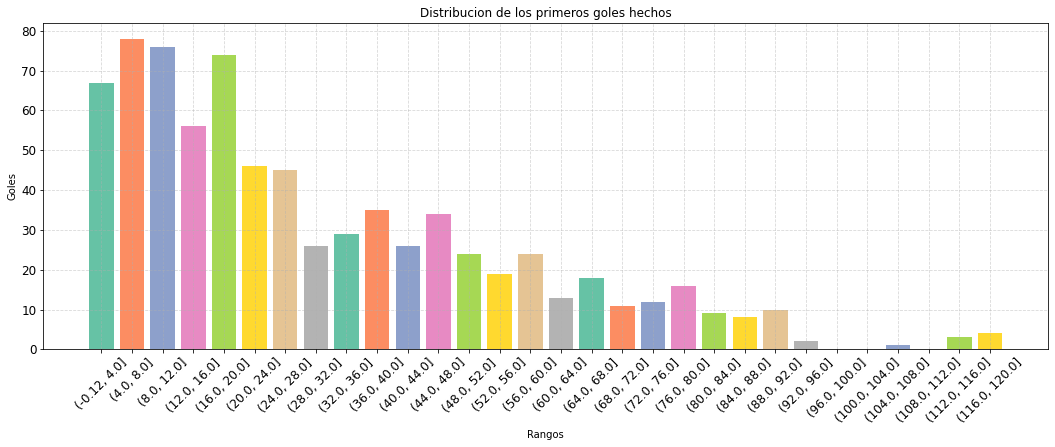

In [ ]:
graficar_distribucion(distribucion_primeros_goles, 'Distribucion de los primeros goles hechos')

Armo una lista de los partidos en los que hubo mas de un gol

In [ ]:
mas_de_un_gol = []
for partido in goles_partido.keys():
  if len(goles_partido[partido])>1:
    mas_de_un_gol = np.append(mas_de_un_gol,partido)

mas_de_un_gol = mas_de_un_gol.astype(int)

Ahora armo una lista con los intervalos transcurridos entre los goles de cada partido y con ella puedo ver la distribucion (Tambien va de 0 a 120 ya que este es el máximo intervalo que puede ocurrir entre dos goles, uno al principio y otro al final)

In [ ]:
partidos_muchos_goles = {}
for partido in mas_de_un_gol:
  partidos_muchos_goles[partido] = goles_partido[partido]

intervalos = []
for partido in partidos_muchos_goles.keys():
  goles_partido_actual = list(partidos_muchos_goles[partido])
  goles_partido_actual.sort()                #Ordeno la lista de goles en un partido para ir evaluando el intervalo entre cada gol y su sucesor
  for gol in range(len(goles_partido_actual)-1):
    intervalo = goles_partido_actual[gol+1]-goles_partido_actual[gol]
    intervalos = np.append(intervalos,intervalo)

intervalos = intervalos.astype(float)
distribucion_intervalos = distribucion(intervalos)
print(distribucion_intervalos)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Minutos
(-0.12, 4.0]      265
(4.0, 8.0]        266
(8.0, 12.0]       201
(12.0, 16.0]      167
(16.0, 20.0]      139
(20.0, 24.0]      112
(24.0, 28.0]      108
(28.0, 32.0]       62
(32.0, 36.0]       64
(36.0, 40.0]       45
(40.0, 44.0]       45
(44.0, 48.0]       31
(48.0, 52.0]       21
(52.0, 56.0]       20
(56.0, 60.0]       18
(60.0, 64.0]       15
(64.0, 68.0]       10
(68.0, 72.0]        5
(72.0, 76.0]        8
(76.0, 80.0]        4
(80.0, 84.0]        6
(84.0, 88.0]        1
(88.0, 92.0]        0
(92.0, 96.0]        0
(96.0, 100.0]       0
(100.0, 104.0]      0
(104.0, 108.0]      0
(108.0, 112.0]      0
(112.0, 116.0]      0
(116.0, 120.0]      0
Name: Goles, dtype: int64


Gráfico:

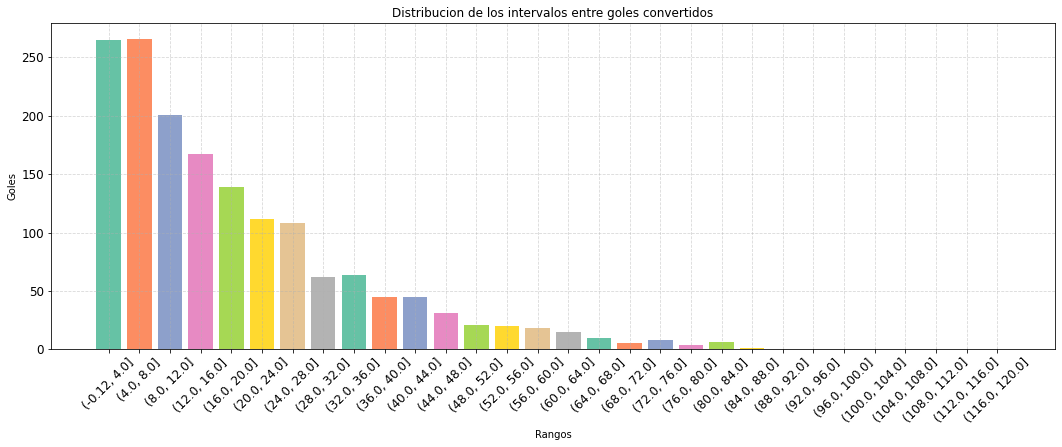

In [ ]:
graficar_distribucion(distribucion_intervalos, 'Distribucion de los intervalos entre goles convertidos')

Estas últimas distribuciones se parecen a algunas estudiadas en clase.
La distribucion de los primeros goles es similar a la distribucion de poisson. Esta es una distribucion discreta que nos dice la probabilidad de que ocurra una cierta cantidad de eventos en un período determinado (En este caso 120 mins).
Por otro lado, la distribucion del intervalo de tiempo entre dos goles es similar a una exponencial decreciente. Debemos tener en cuenta que la distribucion exponencial es continua y los datos con los que trabajamos son discretos. Esto se debe a que tenemos una cantidad finita de partidos para analizar, sin embargo pareciera ser que a medida que mas partidos tomemos, se aproxima mas a una exponencial decreciente.